In [1]:
"""
[과제공지!]
세 번째 과제는 오늘 실습할 때 사용한 Air Quality 데이터셋에서 변수 PT08.S3(NOX) 에 대해서
IQR 기반 그리고 
Z-score 기반 이상치 탐지하는 코드를 작성해서 깃허브 계정에 업로드해주세요.

"""
#결측치: 데이터에 값이 없는 것을 뜻


'\n[과제공지!]\n\n\n세 번째 과제는 오늘 실습할 때 사용한 Air Quality 데이터셋에서 변수 PT08.S3(NOX) 에 대해서\nIQR 기반 그리고 \nZ-score 기반 이상치 탐지하는 코드를 작성해서 깃허브 계정에 업로드해주세요.\n\n'

In [83]:
import pandas as pd
import numpy as np
from pandas import datetime
from matplotlib import pyplot as plt

"""
Load AirQualityUCI Data
"""

def parser(x):
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

input_file = './data/AirQualityUCI_refined.csv'

df = pd.read_csv(input_file,
                 index_col=[0],
                 parse_dates=[0],
                 date_parser=parser)
#name: 사용할 변수명 
#index_col: 인덱스로 사용할 열
#parse_dates:시계열 타입으로 변환할 변수
#header: 컬럼명으로 사용할 행의 번호
#skiprows: 해당 줄 제외
#parse_dates: 시계열 구문 분석?
df.head() #데이터 상단 부 출력

C:\Users\mycin\AppData\Local\Temp\ipykernel_10520\1206020557.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


,CO(GT),PT08.S1(CO),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),RH,AH,C6H6(GT)
Datetime,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,1046.0,166.0,1056.0,113.0,1692.0,1268.0,48.9,0.7578,11.9
2004-03-10 19:00:00,2.0,1292.0,955.0,103.0,1174.0,92.0,1559.0,972.0,47.7,0.7255,9.4
2004-03-10 20:00:00,2.2,1402.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,54.0,0.7502,9.0
2004-03-10 21:00:00,2.2,1376.0,948.0,172.0,1092.0,122.0,1584.0,1203.0,60.0,0.7867,9.2
2004-03-10 22:00:00,1.6,1272.0,836.0,131.0,1205.0,116.0,1490.0,1110.0,59.6,0.7888,6.5


In [19]:
# Visualization setup
# %matplotlib
# from matplotlib import pyplot as plt
# import seaborn; seaborn.set()  # set plot styles
# %config InlineBackend.figure_format = 'svg'
# plt.rcParams['figure.figsize'] = [10, 5]
# plt.ion() # enable the interactive mode

<AxesSubplot:xlabel='Datetime'>

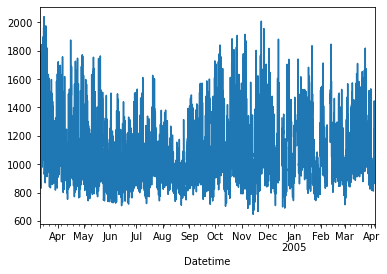

In [84]:
# Visualize the 'PT08.S1(CO)' variable
df['PT08.S1(CO)'].plot()

In [85]:
# Linear interpolation
pt = df['PT08.S1(CO)'].copy()
pt.interpolate(inplace=True)

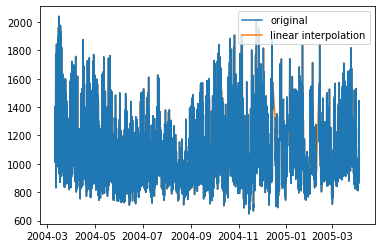

In [86]:
# Visualize original and imputed data
plt.plot(df['PT08.S1(CO)'], label='original', zorder=2)
plt.plot(pt, label='linear interpolation', zorder=1)
plt.legend(loc='best')

{'whiskers': [<matplotlib.lines.Line2D at 0x150d77ccee0>,
 'caps': [<matplotlib.lines.Line2D at 0x150d77dc4c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x150d77ccc10>],
 'medians': [<matplotlib.lines.Line2D at 0x150d77dca60>],
 'fliers': [<matplotlib.lines.Line2D at 0x150d77dcd30>],
 'means': []}

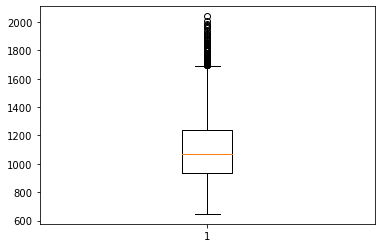

In [87]:
# Detecting outliers using Boxplot
plt.boxplot(pt)

In [88]:
# Calculate correlations between variables
corr_matrix = df.corr()#corr메서드는 각 열 간의 상관 계수를 반환
corr_matrix

,CO(GT),PT08.S1(CO),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),RH,AH,C6H6(GT)
CO(GT),1.000000,0.877203,0.914973,0.792557,-0.701703,0.679262,0.639470,0.851403,0.040218,0.065809,0.845144
PT08.S1(CO),0.877203,1.000000,0.892964,0.713654,-0.771938,0.641529,0.682881,0.899324,0.114606,0.135324,0.883795
PT08.S2(NMHC),0.914973,0.892964,1.000000,0.704435,-0.796703,0.646245,0.777254,0.880578,-0.090380,0.186933,0.981950
NOx(GT),0.792557,0.713654,0.704435,1.000000,-0.655707,0.763111,0.233731,0.787046,0.221032,-0.149323,0.626638
PT08.S3(NOx),-0.701703,-0.771938,-0.796703,-0.655707,1.000000,-0.652083,-0.538468,-0.796569,-0.056740,-0.232017,-0.735744
NO2(GT),0.679262,0.641529,0.646245,0.763111,-0.652083,1.000000,0.157360,0.708128,-0.091759,-0.335022,0.544039
PT08.S4(NO2),0.639470,0.682881,0.777254,0.233731,-0.538468,0.157360,1.000000,0.591144,-0.032188,0.629641,0.765731
PT08.S5(O3),0.851403,0.899324,0.880578,0.787046,-0.796569,0.708128,0.591144,1.000000,0.124956,0.070751,0.865689
RH,0.040218,0.114606,-0.090380,0.221032,-0.056740,-0.091759,-0.032188,0.124956,1.000000,0.167971,-0.061681
AH,0.065809,0.135324,0.186933,-0.149323,-0.232017,-0.335022,0.629641,0.070751,0.167971,1.000000,0.167972


In [89]:
# Choose the least correlated variable 산포도
rh = df['RH'].copy().interpolate() # Relative Humidity

Text(0.5, 1.0, 'Detecting outliers using Boxplot')

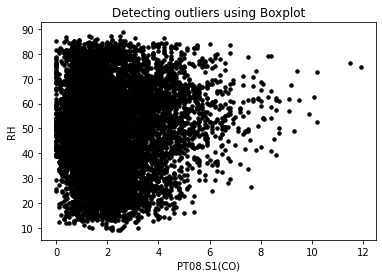

In [90]:
# Visualize a scatter plot(CO, RH)  산포도산포도
plt.scatter(co, rh, s=12, c='black')
plt.xlabel('PT08.S1(CO)')
plt.ylabel('RH')
plt.title("Detecting outliers using Boxplot")

In [91]:
# Choose the most correlated variable
nmhc = df['PT08.S2(NMHC)'].copy().interpolate() # NMHC: Non-metanic Hydrocarbon 일산화탄소와 상간관관계가 있는 nhc 변수를 포함해주는 코드

Text(0, 0.5, 'NMHC')

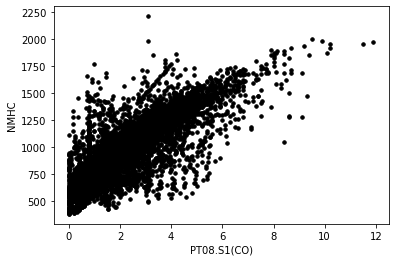

In [92]:
# Visualize a scatter plot(CO, NMHC)
plt.scatter(co, nmhc, s=12, c='black')
plt.xlabel('PT08.S1(CO)')
plt.ylabel("NMHC")

In [100]:
"""
IQR-based Outlier Detection
"""

# Q1, Q2(median), Q3

q1 = pt.quantile(0.25)
median = pt.quantile(0.5)    #50 상위 50퍼
q3 = pt.quantile(0.75)           # 상위 80퍼
print(q1,median,q3)

938.0 1067.0 1239.0


In [101]:
# IQR, upper_fence, lower_fence

iqr = q3-q1
upper_fence = q3 + 1.5*iqr
lower_fence = q1 = 1.5*iqr
print(iqr , upper_fence ,0)

301.0 1690.5 0


In [125]:
# Filtering the outliers
outliers = pt.loc[(pt > upper_fence) | (pt < lower_fence)]
print(outliers)

Datetime
2004-03-11 19:00:00    1776.0
2004-03-12 20:00:00    1843.0
2004-03-14 19:00:00    1808.0
2004-03-14 20:00:00    1898.0
2004-03-15 08:00:00    1797.0
                        ...  
2005-02-13 00:00:00    1712.0
2005-02-13 01:00:00    1751.0
2005-03-15 20:00:00    1710.0
2005-03-24 19:00:00    1726.0
2005-03-24 20:00:00    1818.0
Name: PT08.S1(CO), Length: 103, dtype: float64


In [103]:
# Mask for outliers # co는 모든 인덱스 아웃라이어즈는 이상치만
mask = pt.index.isin(outliers.index) # isin(): DataFrame객체의 각 요소가 values값과 일치하는지 여부
mask[:50]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [104]:
pt[~mask]

Datetime
2004-03-10 18:00:00    1360.0
2004-03-10 19:00:00    1292.0
2004-03-10 20:00:00    1402.0
2004-03-10 21:00:00    1376.0
2004-03-10 22:00:00    1272.0
                        ...  
2005-04-04 10:00:00    1314.0
2005-04-04 11:00:00    1163.0
2005-04-04 12:00:00    1142.0
2005-04-04 13:00:00    1003.0
2005-04-04 14:00:00    1071.0
Name: PT08.S1(CO), Length: 9254, dtype: float64

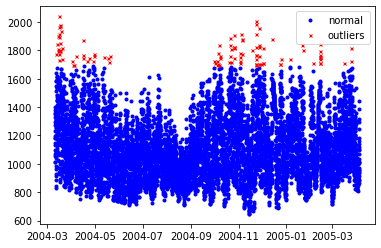

In [105]:
# Visualize the normal data and outliers ~: not
plt.plot(pt[~mask], label='normal', color='blue', marker='o', markersize=3, linestyle='None')
plt.plot(outliers, label='outliers', color='red',marker='x', markersize=3, linestyle='None')
plt.legend(loc='best')

In [106]:
# Removing the outliers  이상치 삭제
pt_refined = pt.copy()
pt_refined[mask] = np.nan #특정 값 nan으로
print(pt_refined[mask])

Datetime
2004-03-11 19:00:00   NaN
2004-03-12 20:00:00   NaN
2004-03-14 19:00:00   NaN
2004-03-14 20:00:00   NaN
2004-03-15 08:00:00   NaN
                       ..
2005-02-13 00:00:00   NaN
2005-02-13 01:00:00   NaN
2005-03-15 20:00:00   NaN
2005-03-24 19:00:00   NaN
2005-03-24 20:00:00   NaN
Name: PT08.S1(CO), Length: 103, dtype: float64


<AxesSubplot:xlabel='Datetime'>

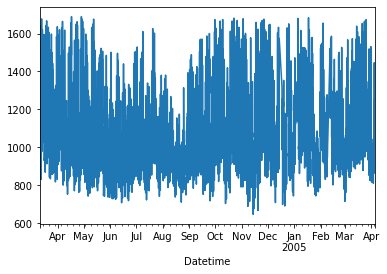

In [107]:
# Linear interpolation for reconstructing outliers removed.
pt_refined.interpolate(inplace=True)#결측치보간법
pt_refined.plot() 

In [108]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


C:\Users\mycin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PT08.S1(CO)', ylabel='Density'>

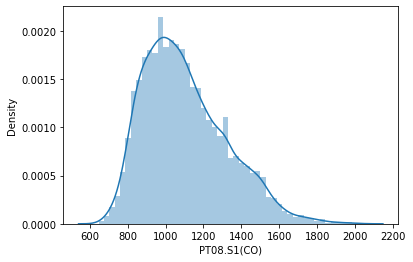

In [109]:
"""
Detecting Outliers with Z-Scores
정규분포에서 특정 거리만큼 떨어진거
"""

# Visualize the distribution of the 'CO(GT)' variable
import seaborn as sns

sns.distplot(pt)

In [110]:
# Mean, Standard deviation
mean = np.mean(pt)
std = np.std(pt)
print(mean , std)




1103.0597413700973 218.18468624740942


In [111]:
a =round(mean)
b = round(std)
print(a,b)

1103 218


In [112]:
# Calculate Z-scores for each data points
outliers = []
thres = 3

for i in pt:
    z_score = (i-mean) / std
    if(np.abs(z_score) > thres):
        print(z_score)
        outliers.append(i)

3.084268975077497
3.391348271761159
3.230933713792082
3.643428291426852
3.180517709858943
3.9321744957711915
3.061352609653343
3.730510480038637
4.2942530694728225
3.6296784721723596
3.1942675291134357
3.432597729524636
3.9871737727891605
3.996340318958822
3.1713511636892817
3.80842612248076
3.2813497177252207
3.0338529711443583
3.538013010475744
3.061352609653343
3.0155198788050352
3.0246864249746968
3.0934355212471587
3.377598452506667
3.579262468239221
3.354682087082513
3.0063533326353737
3.230933713792082
3.267599898470728
3.3042660831493746
3.2950995369797127
3.68926102227516
3.0934355212471587
3.7213439338689756
3.5700959220695596
3.51509664505159
3.0751024289078353
3.203434075283097
3.0384362442291892
3.0521860634836817
3.290516263894882
4.0284232305526375
4.1475883307582375
3.7350937531234676
3.2950995369797127
3.9092581303470375
3.350098813997682
3.0063533326353737
3.267599898470728
3.565512648984729
3.354682087082513
3.2126006214527587
3.0384362442291892
3.4050980910156516
3.

In [114]:
# Simplified version of filtering outliers
outliers = pt.loc[np.abs((pt - mean) / std) > 3]
print(outliers)

Datetime
2004-03-11 19:00:00    1776.0
2004-03-12 20:00:00    1843.0
2004-03-14 19:00:00    1808.0
2004-03-14 20:00:00    1898.0
2004-03-15 08:00:00    1797.0
2004-03-15 09:00:00    1961.0
2004-03-15 10:00:00    1771.0
2004-03-15 18:00:00    1917.0
2004-03-15 19:00:00    2040.0
2004-03-15 20:00:00    1895.0
2004-03-16 21:00:00    1800.0
2004-03-17 09:00:00    1852.0
2004-03-17 19:00:00    1973.0
2004-03-17 20:00:00    1975.0
2004-03-17 21:00:00    1795.0
2004-03-18 09:00:00    1934.0
2004-03-19 09:00:00    1819.0
2004-04-15 18:00:00    1765.0
2004-04-15 19:00:00    1875.0
2004-04-29 08:00:00    1771.0
2004-04-29 19:00:00    1761.0
2004-05-20 08:00:00    1763.0
2004-10-05 19:00:00    1778.0
2004-10-06 19:00:00    1840.0
2004-10-20 17:00:00    1884.0
2004-10-20 18:00:00    1835.0
2004-10-20 19:00:00    1759.0
2004-10-22 18:00:00    1808.0
2004-10-25 17:00:00    1816.0
2004-10-25 18:00:00    1824.0
2004-10-26 17:00:00    1822.0
2004-10-26 18:00:00    1908.0
2004-11-02 20:00:00    1778.0
2

In [116]:
# Mask for outliers
mask = pt.index.isin(outliers.index)
mask[:50]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

C:\Users\mycin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mycin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


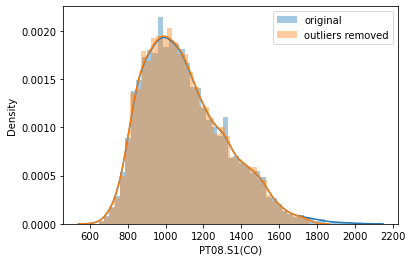

In [122]:
# Comparison of distributions before/after outlier removal
sns.distplot(pt, axlabel='PT08.S1(CO)', label='original')
sns.distplot(pt[~mask], label='outliers removed')
plt.legend(loc='best')

# [exer] Adjust thres

In [123]:
# Flooring and Capping
floor = pt.quantile(0.1)# 상위 10퍼
cap = pt.quantile(0.9) # 하위 10퍼
pt.loc[pt < floor]
pt.loc[pt >cap] 


Datetime
2004-03-11 18:00:00    1581.0
2004-03-11 19:00:00    1776.0
2004-03-11 20:00:00    1640.0
2004-03-12 08:00:00    1587.0
2004-03-12 09:00:00    1545.0
                        ...  
2005-03-25 20:00:00    1605.0
2005-03-25 21:00:00    1460.0
2005-03-29 08:00:00    1519.0
2005-03-31 07:00:00    1531.0
2005-04-04 08:00:00    1446.0
Name: PT08.S1(CO), Length: 936, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x150db85e9a0>,
 'caps': [<matplotlib.lines.Line2D at 0x150db85ef40>,
 'boxes': [<matplotlib.lines.Line2D at 0x150db852550>],
 'medians': [<matplotlib.lines.Line2D at 0x150db86d520>],
 'fliers': [<matplotlib.lines.Line2D at 0x150db86d7f0>],
 'means': []}

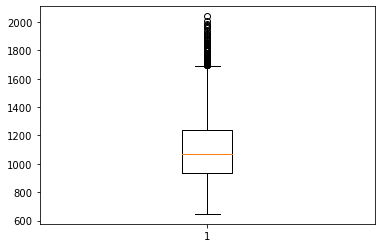

In [124]:
plt.boxplot(pt)